# Table of Contents

- [Introduction](#0.-Introduction)
- [Creating Trainset](#Creating-the-trainset)
- [Class balance](#1.-What-is-the-class-label-distribution?)
- [Impact of Education](#2.-How-many-different-types-of-Education-are-there-?)
- [Female Employee](#3.-Are-female-employees-really-deprived-of-promotions?)
- [Impact of KPI](#4.-How-much-KPI-is-important?)
- [Impact of training](#5.-Does-more-training-gives-leverage-to-promotion?)
- [Bivariate Analysis](#Bivariate-Analysis)
- [Encoding](#Encoding-the-categorical-columns)
- [Trainset](#Creating-the-trainset)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(12, 8)})

## 0. Introduction

In [85]:
train = pd.read_csv('./data/train.csv', index_col='employee_id')
test = pd.read_csv('./data/test.csv', index_col='employee_id')
test['is_promoted'] = 2

In [86]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [87]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,2
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,2
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,2
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,2
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,2


In [88]:
data = pd.concat([train, test])

In [89]:
data.shape

(78298, 13)

In [90]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [91]:
data.isnull().any()

department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

## 1. What is the class label distribution?

In [92]:
train.is_promoted.value_counts() / train.shape[0] * 100.0

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

### Conclusion

The dataset seems fairly imbalanced. We may try the following things

- Up/Down sampling
- Algorithms with class penalties
- Synthetic Data generation
- Smart Ensembles

## 2. How many different types of Education are there ?

In [93]:
data.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [94]:
data['education'] = data.education.map({"Master's & above": 'masters', 
                                       "Bachelor's": "bachelors",
                                       'Below Secondary': 'secondary'})

In [95]:
data.education.fillna('unknown', inplace=True)

In [96]:
data.education.unique()

array(['masters', 'bachelors', 'unknown', 'secondary'], dtype=object)

### Conclusion

- NaN in education can be a good feature and hence instead of dropping it, I intend to keep it
- As the number of different types of education is samller, we can do OneHotEncoding of this column

# Univariate Analysis

## 3. Are female employees really deprived of promotions?

In [46]:
train.gender.unique()

array(['f', 'm'], dtype=object)

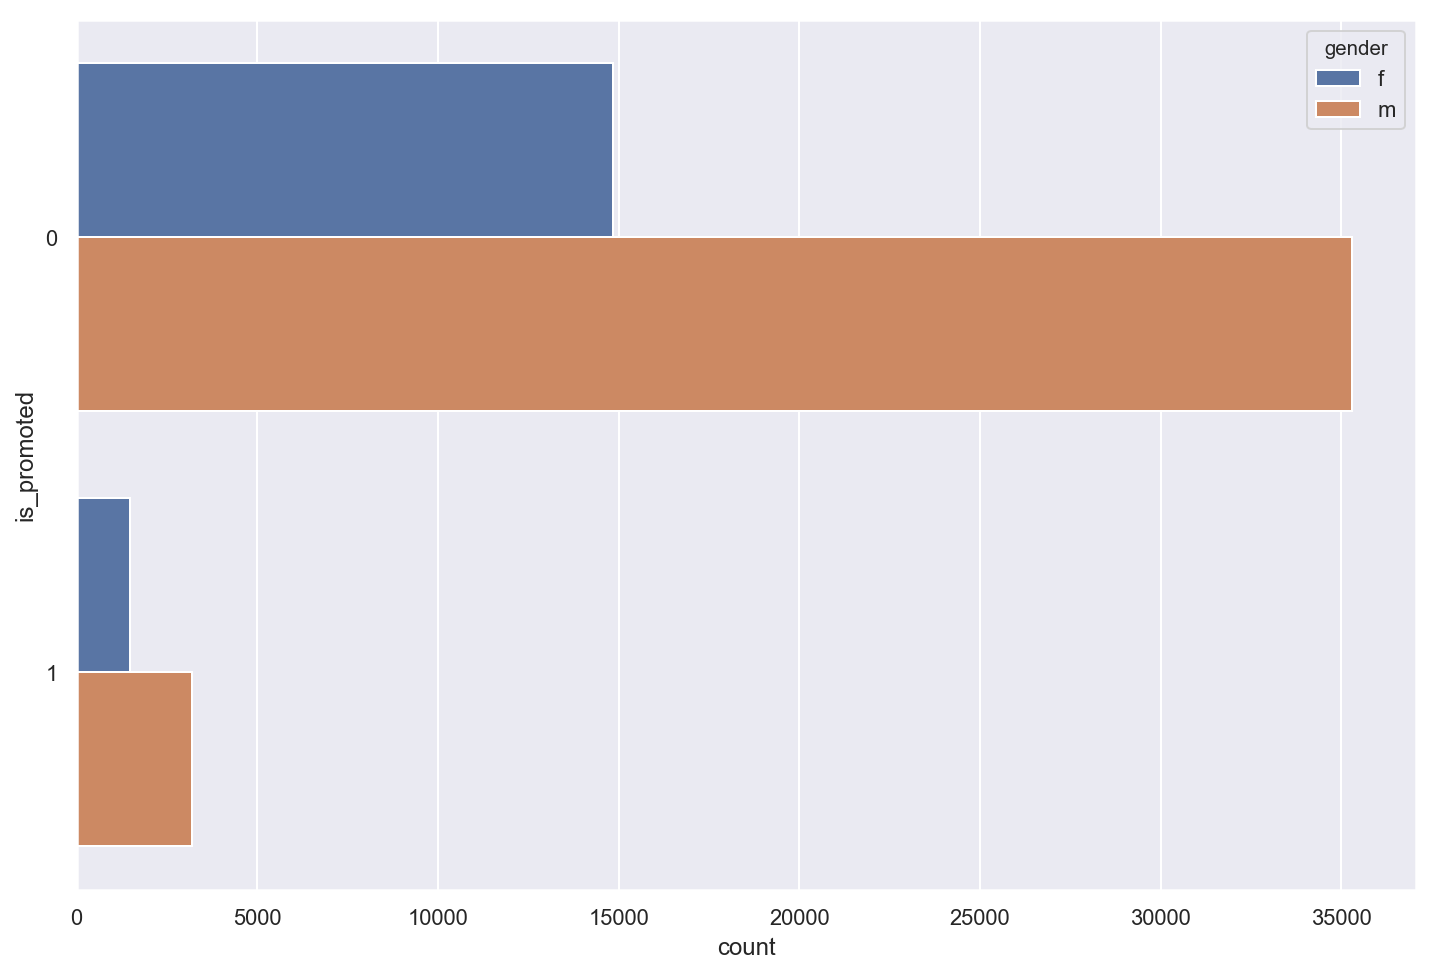

In [47]:
sns.countplot(y='is_promoted', data=train, hue='gender');

#### Let's dig deeper

In [48]:
NF = train[data.gender == 'f'].shape[0]
NM = train[data.gender == 'm'].shape[0]
fp = train[(data.gender == 'f') & (train.is_promoted == 1)].shape[0]
mp = train[(data.gender == 'm') & (train.is_promoted == 1)].shape[0]
fper = fp / NF * 100.0
mper = mp / NM * 100.0

/Users/mayukhsarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/mayukhsarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/mayukhsarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mayukhsarkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [49]:
mper

8.315149625935161

In [50]:
fper

8.993379107405591

### Conclusion

- As the data suggests there seems to be no bias towards gender, however in real life the scenario might be different. 

- This might suggest me that simple gender might not be a good feature however we shall explore further.

## 4. How much KPI is important?

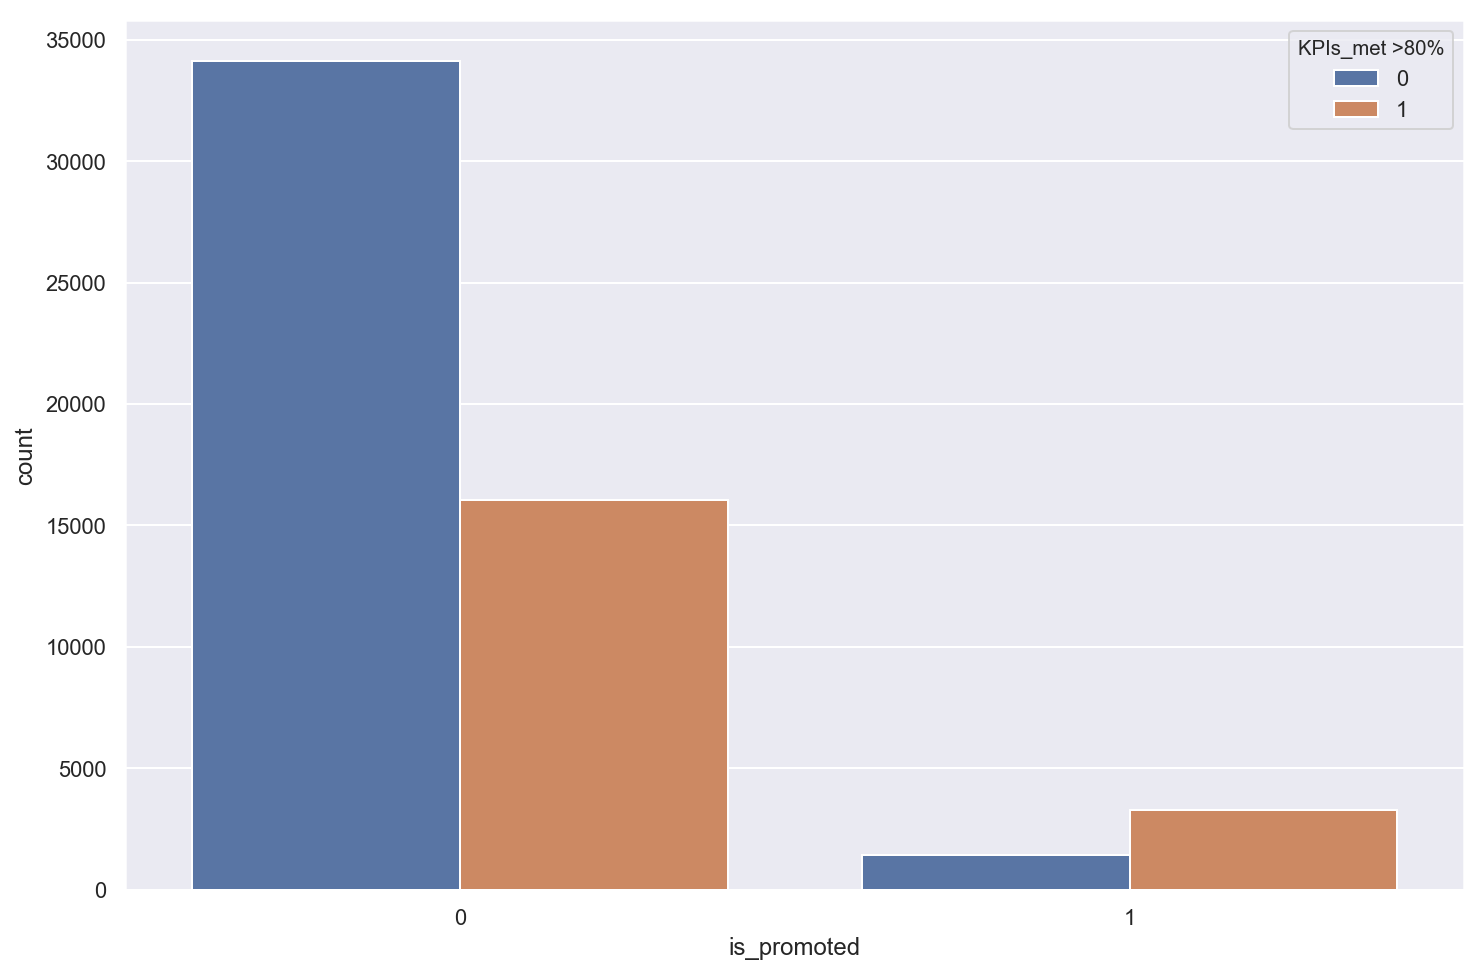

In [51]:
sns.countplot(x='is_promoted', data=train, hue='KPIs_met >80%');

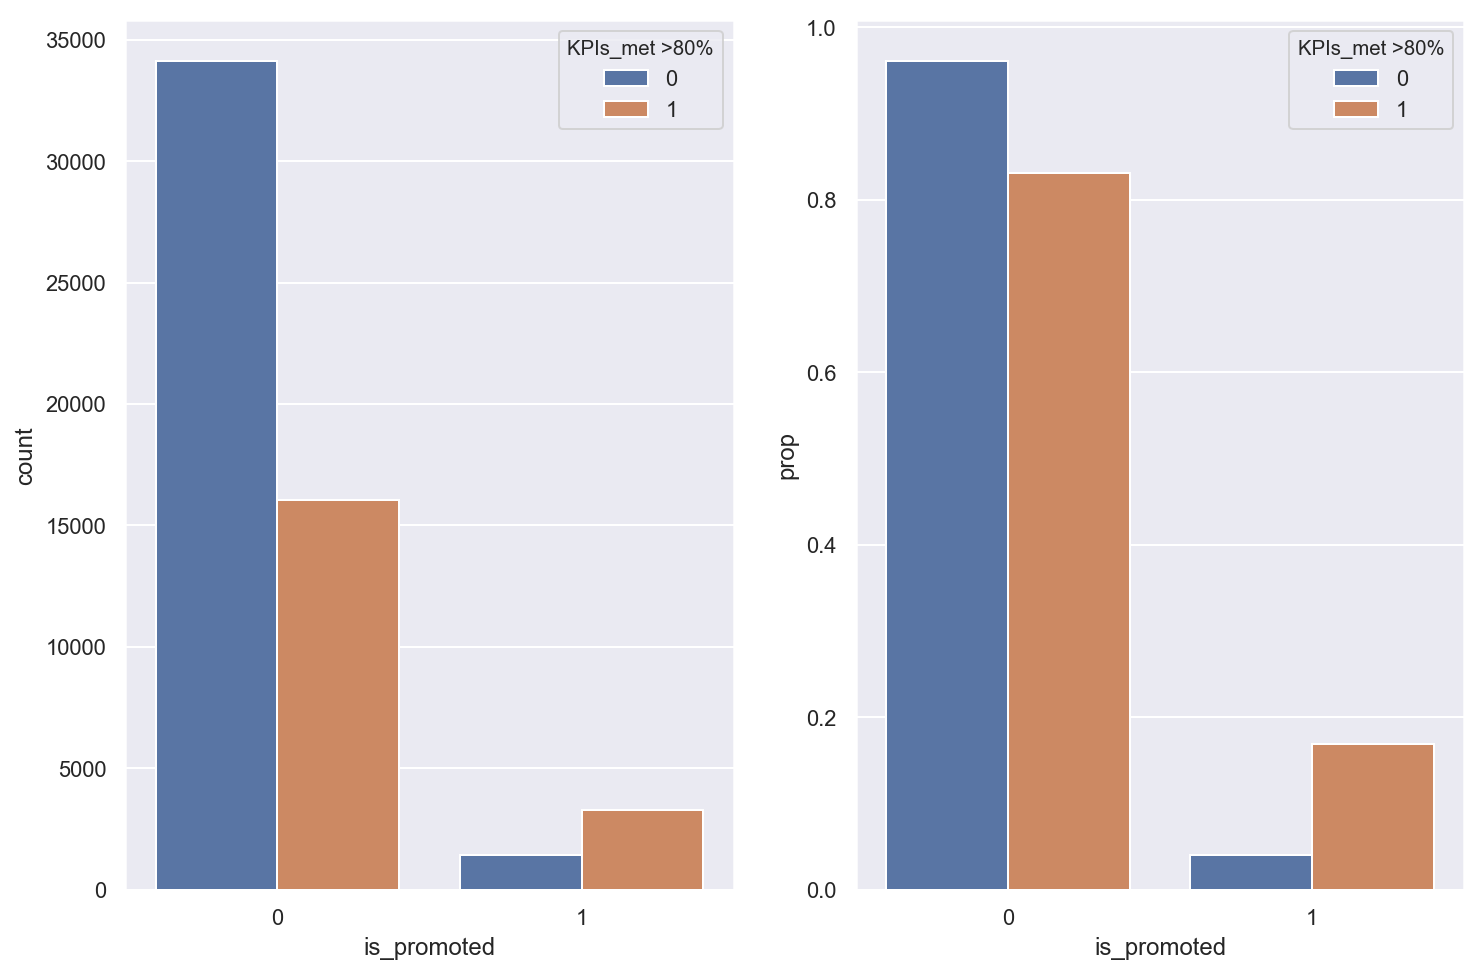

In [52]:
# df = sns.load_dataset("tips")
x, y, hue = "is_promoted", "prop", "KPIs_met >80%"
hue_order = [0, 1]

f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=train, ax=axes[0]);

prop_df = (train[x]
           .groupby(data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1]);

### Conclusion

- We can see that people who got promoted greater percentage are for those people got KPI > 80%. This means that this feature can be an important feature to predict the class label.

- But unfortunately we can also see that so many people who go KPI > 80% never got any promotion. This means this feature alone may not be important.

## 5. Does more training gives leverage to promotion?

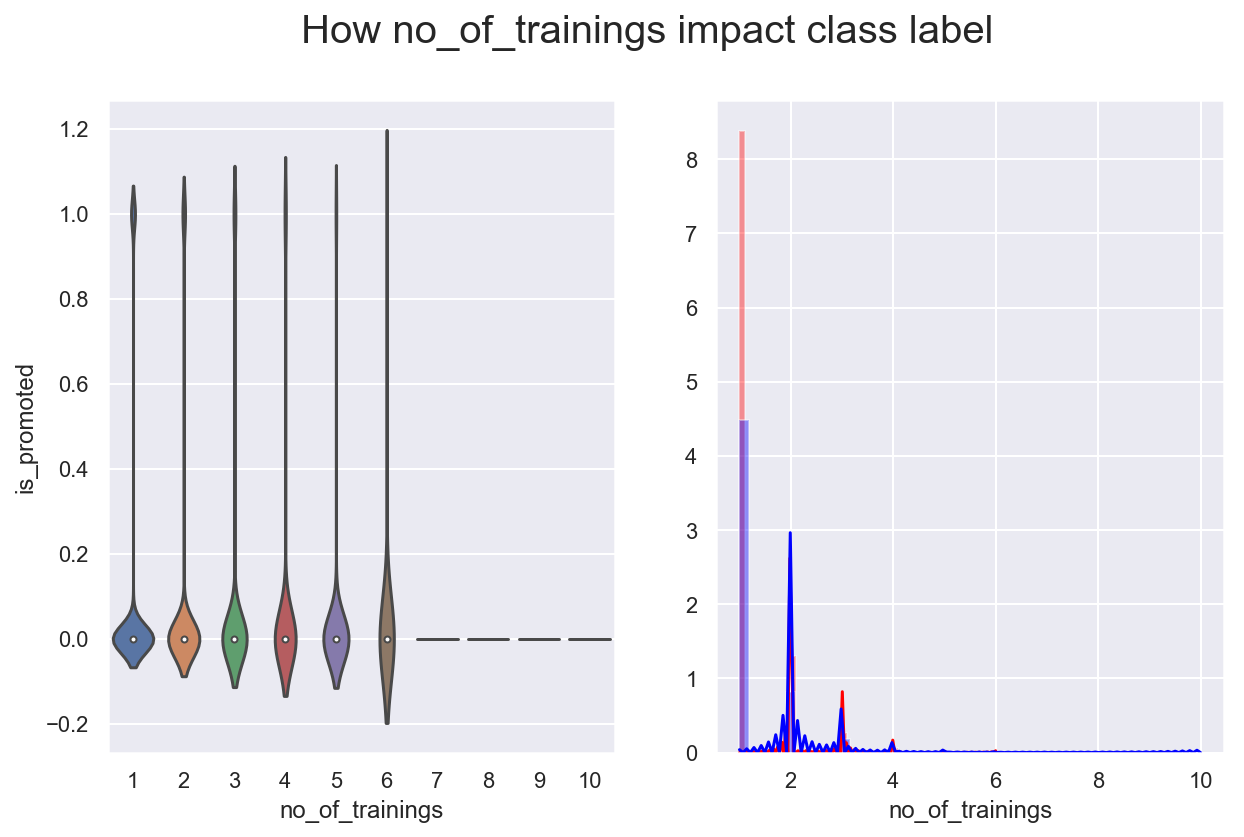

In [54]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.violinplot(x = 'no_of_trainings', y = 'is_promoted', data = train)
plt.subplot(1,2,2)
sns.distplot(train[train['is_promoted'] == 1]['no_of_trainings'] , 
             label = '1', color = 'red')
sns.distplot(train[train['is_promoted'] == 0]['no_of_trainings'], 
             label = "0" , color = 'blue')
plt.suptitle('How no_of_trainings impact class label', fontsize=20)
plt.show()

## Conclusion

- Looks like `no_of_trainings` alone can not much important as it should be.
- May be combination of `no_of_trainings` and some other feature would give some better result.

## 6. How big the age factor is in terms of getting promotions

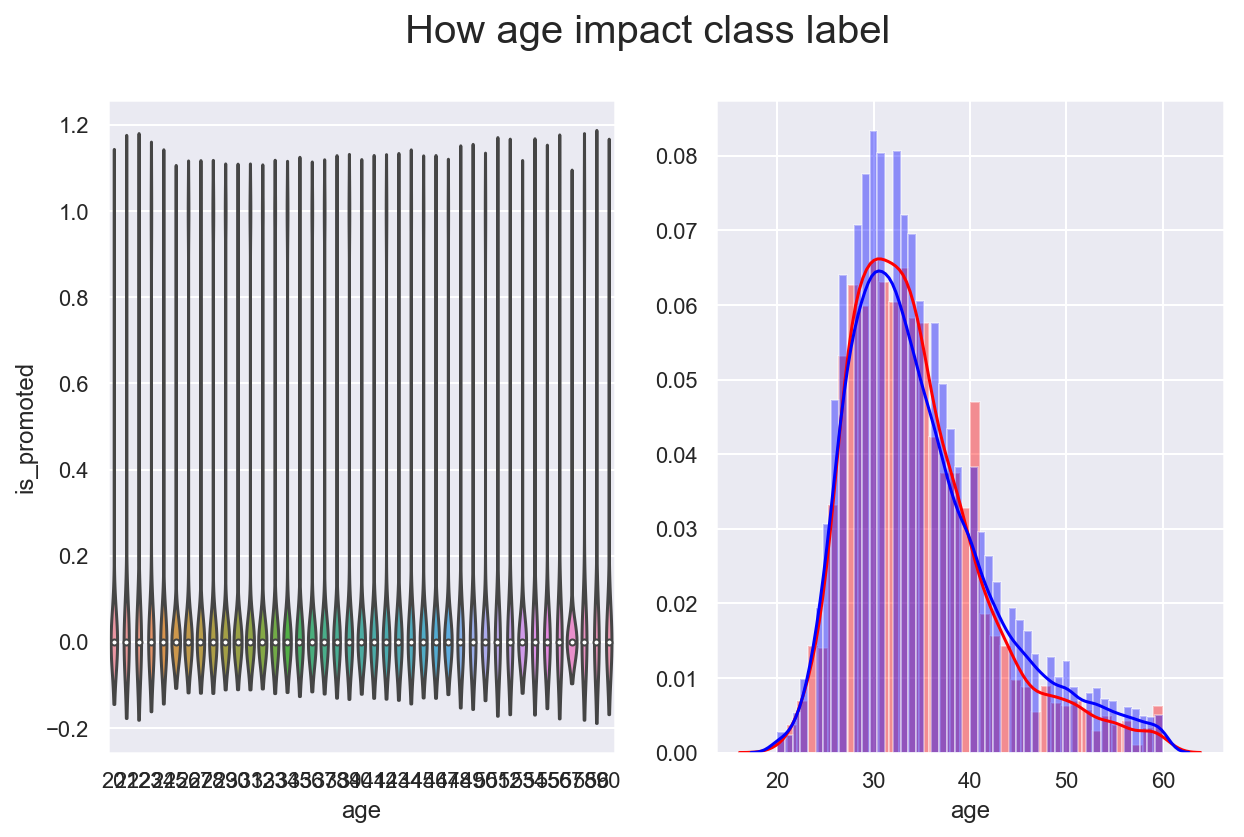

In [55]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.violinplot(x = 'age', y = 'is_promoted', data = train)
plt.subplot(1,2,2)
sns.distplot(train[train['is_promoted'] == 1]['age'] , 
             label = '1', color = 'red')
sns.distplot(train[train['is_promoted'] == 0]['age'], 
             label = "0" , color = 'blue')
plt.suptitle('How age impact class label', fontsize=20)
plt.show()

#### Is there any outliers in the age?

In [56]:
train.age.quantile(np.arange(0, 1, 0.1))

0.0    20.0
0.1    27.0
0.2    28.0
0.3    30.0
0.4    32.0
0.5    33.0
0.6    35.0
0.7    37.0
0.8    40.0
0.9    46.0
Name: age, dtype: float64

In [57]:
train.age.quantile(np.arange(0.9, 1, 0.01))

0.90    46.0
0.91    46.0
0.92    47.0
0.93    48.0
0.94    50.0
0.95    51.0
0.96    52.0
0.97    54.0
0.98    56.0
0.99    58.0
Name: age, dtype: float64

### Conclusion

- Age is not a good in terms of class labels how ever interacting with other variables, age can be an important factor.

## 7. How important is `avg_training_score`?

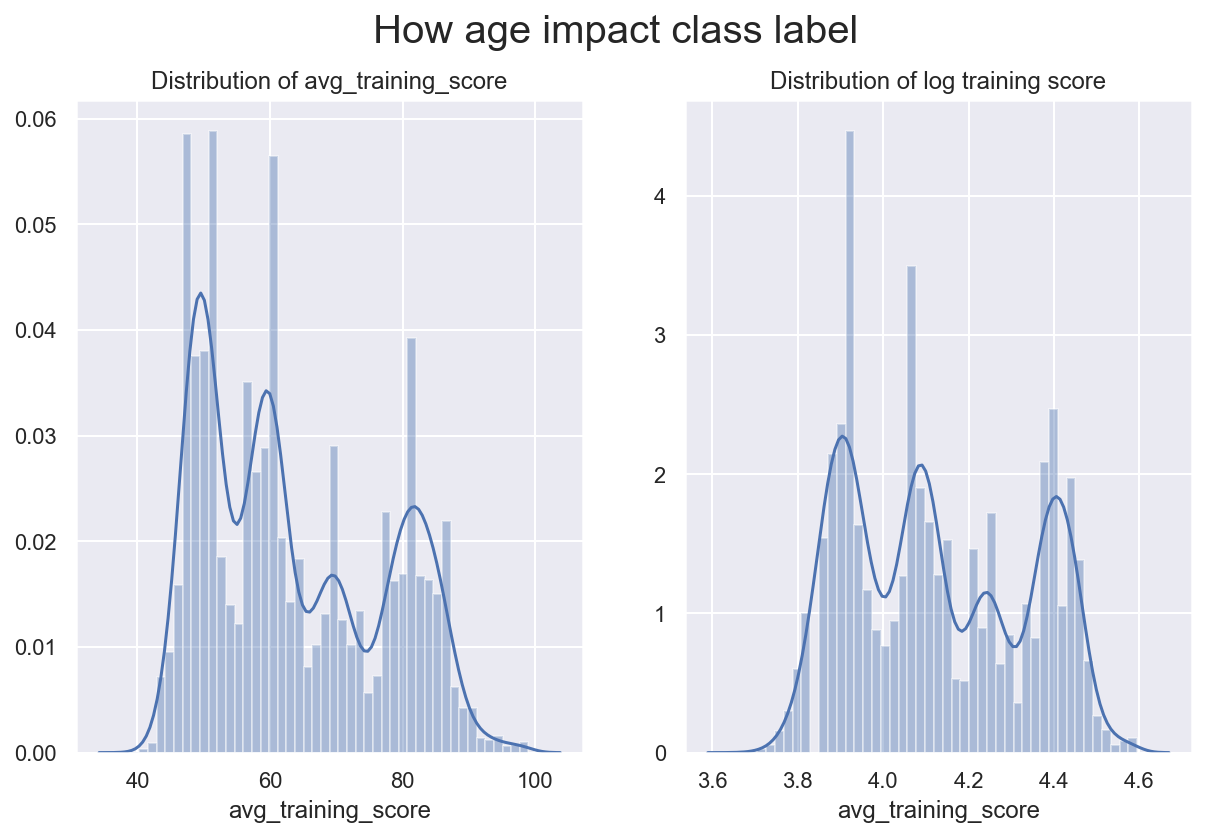

In [58]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.distplot(train.avg_training_score);
plt.title('Distribution of avg_training_score');
plt.subplot(1,2,2)
sns.distplot(np.log(train.avg_training_score))
plt.title('Distribution of log training score')
plt.suptitle('How age impact class label', fontsize=20)
plt.show()

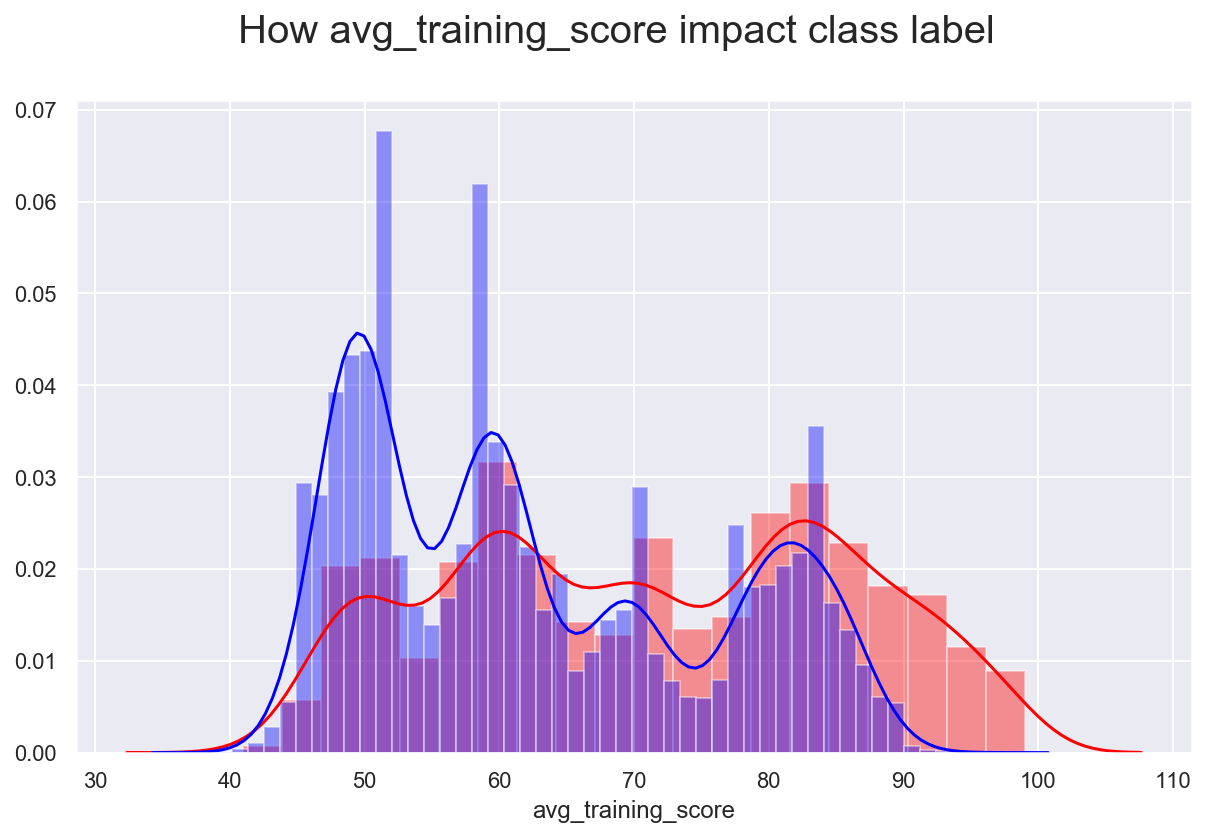

In [59]:
plt.figure(figsize=(10, 6))
sns.distplot(train[train['is_promoted'] == 1]['avg_training_score'] , 
             label = '1', color = 'red')
sns.distplot(train[train['is_promoted'] == 0]['avg_training_score'], 
             label = "0" , color = 'blue')
plt.suptitle('How avg_training_score impact class label', fontsize=20)
plt.show()

### Conclusion

- There seems to be a good amount of seperation. Hence this feature can be useful
- We can also see that even after log transformation, the distribution is multimodal and hence there no need for log transformation.

# Bivariate Analysis

In [60]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [61]:
df = train[['no_of_trainings','age', 
           'length_of_service', 'avg_training_score', 'is_promoted']]

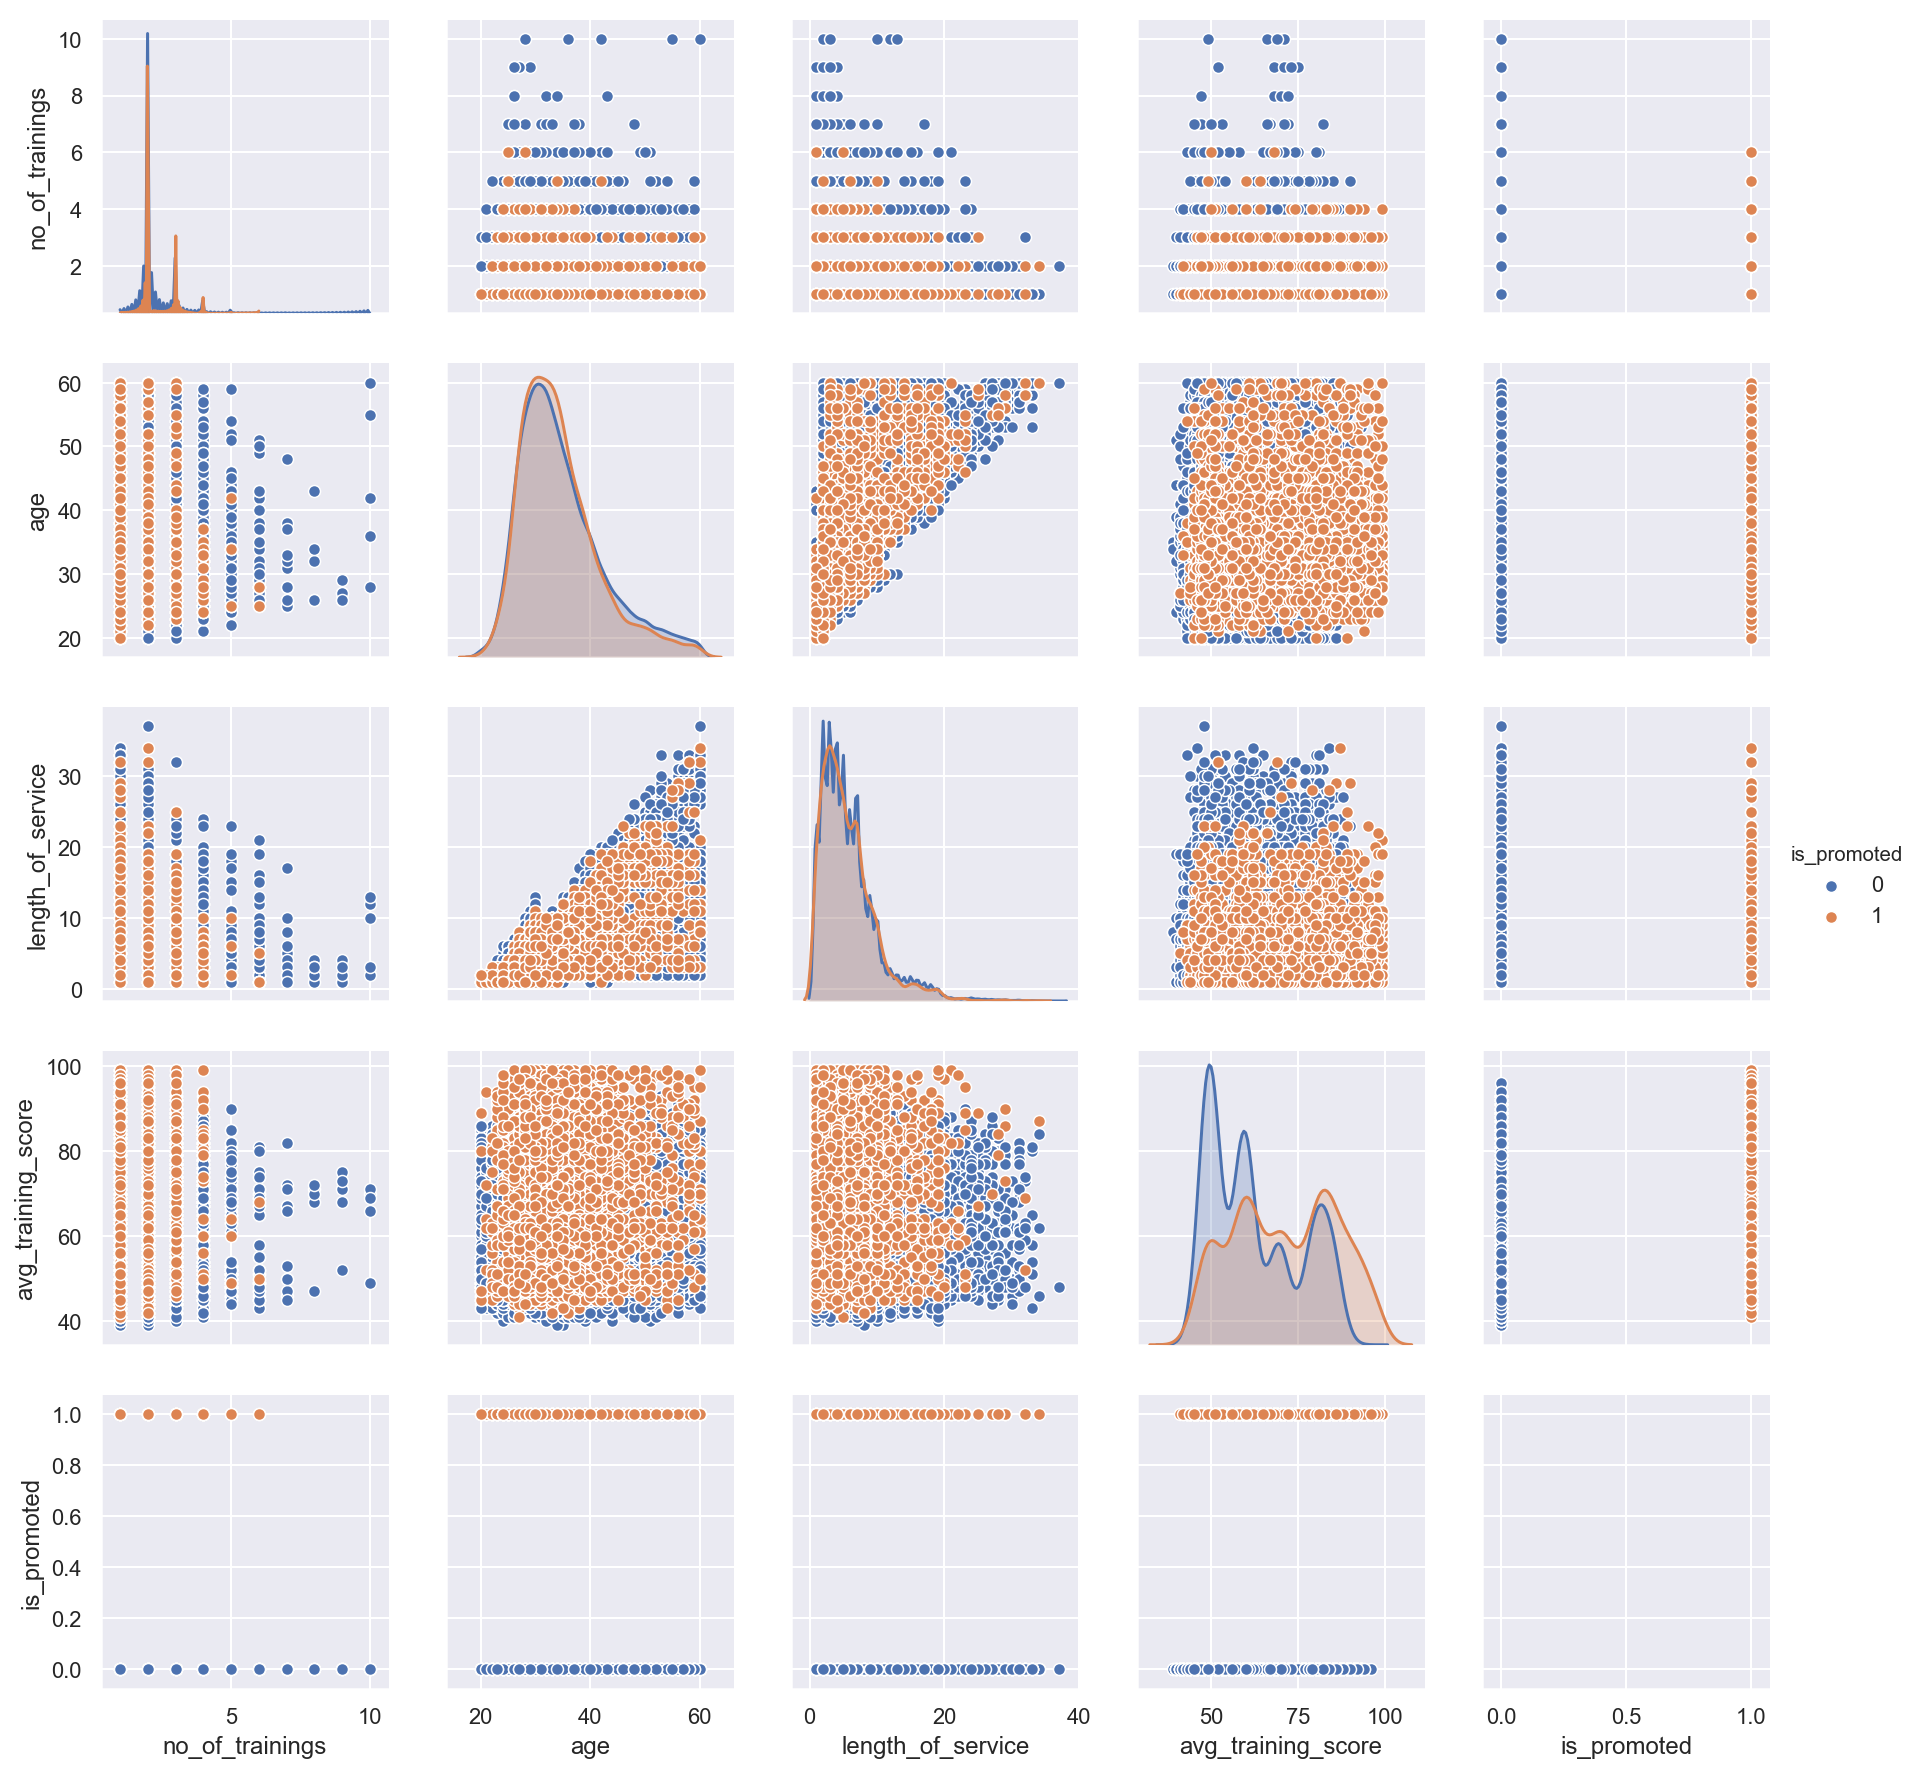

In [45]:
g = sns.pairplot(df, hue="is_promoted")

### Conclusion

- Sadly we can hardly see any bivariate relationship that seperates the class labels comes out. 

## Hadling missing values from `previous_year_rating` column

These employees probably have NaN values in the column because may be these employees have never got any rating previous year. May be the reason can be that they are new joinee only in the current year. Removing the NaN values for these can be bad. 

In [97]:
data.isnull().any()

department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [98]:
data[data.previous_year_rating != data.previous_year_rating].shape

(5936, 13)

In [99]:
data.previous_year_rating.fillna(3.0, inplace=True) # 3 is most occuring

In [100]:
data.isnull().any()

department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

## Feature Engineering

In [101]:
data['work_fraction'] = data['length_of_service'] / data['age']

In [102]:
data['start_year'] = data['age'] - data['length_of_service']

In [103]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'work_fraction', 'start_year'],
      dtype='object')

In [104]:
mean_dep_score = data.groupby('department').avg_training_score.mean().to_dict()
data['dep_avg_training_score'] = data.department.apply(lambda x: mean_dep_score[x])

In [105]:
mean_reg_score = data.groupby('region').avg_training_score.mean().to_dict()
data['reg_avg_training_score'] = data.region.apply(lambda x: mean_reg_score[x])

In [106]:
mean_edu_score = data.groupby('education').avg_training_score.mean().to_dict()
data['edu_avg_training_score'] = data.education.apply(lambda x: mean_edu_score[x])

In [107]:
mean_gen_score = data.groupby('gender').avg_training_score.mean().to_dict()
data['gen_avg_training_score'] = data.gender.apply(lambda x: mean_gen_score[x])

## Encoding the categorical columns (OneHotEncoding)

In [108]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,work_fraction,start_year,dep_avg_training_score,reg_avg_training_score,edu_avg_training_score,gen_avg_training_score
employee_id,,,,,,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,masters,f,sourcing,1,35,5.0,8,1,0,49,0,0.228571,27,50.208487,63.859194,64.077372,63.861889
65141,Operations,region_22,bachelors,m,other,1,30,5.0,4,0,0,60,0,0.133333,26,60.248572,65.602487,63.347771,63.133903
7513,Sales & Marketing,region_19,bachelors,m,sourcing,1,34,3.0,7,0,0,50,0,0.205882,27,50.208487,60.831776,63.347771,63.133903
2542,Sales & Marketing,region_23,bachelors,m,other,2,39,1.0,10,0,0,50,0,0.256410,29,50.208487,64.052632,63.347771,63.133903
48945,Technology,region_26,bachelors,m,other,1,45,3.0,2,0,0,73,0,0.044444,43,79.908464,65.015897,63.347771,63.133903


In [109]:
data_cat = data[['department', 'region', 'education',
                'gender', 'recruitment_channel', ]]


In [110]:
encoded_data_cat_one_hot = pd.get_dummies(data_cat)

## Encoding the categorical columns (Response Coding)

In [42]:
#TODO

## Creating the trainset

In [111]:
data_num = data[['no_of_trainings', 'age', 'previous_year_rating',
                'length_of_service', 'KPIs_met >80%', 'awards_won?',
                'avg_training_score', 'work_fraction', 'start_year',
                'dep_avg_training_score', 'reg_avg_training_score',
                'edu_avg_training_score', 'gen_avg_training_score', 'is_promoted']]
# y = data.is_promoted.values

In [112]:
encoded_data_cat_one_hot.shape

(78298, 52)

In [113]:
data_num.shape

(78298, 14)

In [114]:
data_cleaned = pd.concat([encoded_data_cat_one_hot, data_num], axis=1)
# train_y = y

In [115]:
data_cleaned.shape

(78298, 66)

In [116]:
data_cleaned.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,KPIs_met >80%,awards_won?,avg_training_score,work_fraction,start_year,dep_avg_training_score,reg_avg_training_score,edu_avg_training_score,gen_avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,0,0,0,0,0,0,0,1,0,0,...,1,0,49,0.228571,27,50.208487,63.859194,64.077372,63.861889,0
65141,0,0,0,0,1,0,0,0,0,0,...,0,0,60,0.133333,26,60.248572,65.602487,63.347771,63.133903,0
7513,0,0,0,0,0,0,0,1,0,0,...,0,0,50,0.205882,27,50.208487,60.831776,63.347771,63.133903,0
2542,0,0,0,0,0,0,0,1,0,0,...,0,0,50,0.256410,29,50.208487,64.052632,63.347771,63.133903,0
48945,0,0,0,0,0,0,0,0,1,0,...,0,0,73,0.044444,43,79.908464,65.015897,63.347771,63.133903,0


In [122]:
data_cleaned.shape

(78298, 66)

## More Feature Engineering

In [155]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

In [156]:
y = data_cleaned.is_promoted
X = data_cleaned.drop('is_promoted', axis=1)

In [157]:
X.shape

(78298, 65)

In [162]:
combis = list(combinations(list(X.columns), 2))
cols = list(X.columns) + ['_'.join(x) for x in combis]
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly)
X_poly_df.columns = cols
zero_index = [i for i, x in enumerate(list((X_poly_df == 0).all())) if x]
X_poly_df = X_poly_df.drop(X_poly_df.columns[zero_index], axis=1)

In [163]:
X_poly_df.shape

(78298, 1488)

In [168]:
X_poly_df.index = y.index # Index is the employee ids

In [169]:
X_poly_df['is_promoted'] = y

In [171]:
dtrain = X_poly_df[X_poly_df.is_promoted != 2]
dtest = X_poly_df[X_poly_df.is_promoted == 2]

In [176]:
assert(dtrain.shape[0] == train.shape[0])
assert(dtest.shape[0] == test.shape[0])

In [177]:
dtrain.to_csv('./data/dtrain.csv', index=False)
dtest.to_csv('./data/dtest.csv', index=False)

In [178]:
!ls ./data/

dtest.csv                     train.csv
dtrain.csv                    train_cleaned.csv
sample_submission_M0L0uXE.csv y.npy
test.csv
